In [253]:
#Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight 
#tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so 
#unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything
#can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March 
#and June of 2019 and between various cities.

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [255]:
########Read the test and train data..
TrainDs=pd.read_csv('D:\DataScience\Hackathon\FlightPriceHackathon\Flight_Ticket_Participant_Datasets\\Data_Train.csv',skipinitialspace=True)

In [256]:
## clean the data and preporocesss it for visuualizationa and EDA.
TrainDs.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,3/22/2019 1:10,2h 50m,non-stop,No info,3897
1,Air India,1/5/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,6/10/2019 4:25,19h,2 stops,No info,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [257]:
########Read the test and train data..
TestDs=pd.read_csv('D:\DataScience\Hackathon\FlightPriceHackathon\Flight_Ticket_Participant_Datasets\\Test_set.csv',skipinitialspace=True)

In [258]:
## viaualize the data..
TestDs.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [259]:
TrainDs.info() ## No null vlues found....except in route and total stops.. Lets remove this row itself

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [260]:
TrainDs=TrainDs.dropna()

In [261]:
TrainDs.apply(lambda x:x.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [262]:
TestDs.info() ## No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [263]:
TestDs.apply(lambda x:x.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [264]:
#### Some possible EDA and feature engineering to be done ...
#1. change the date format..
#2. Route- chnage it to Source Destination and stop 
#3. Dept time.. hours and mins 
#4. Arrival_time.. change format 
#5. Duration... format
#6. Additional info...

In [265]:
TrainDs['Journey_Day'] = pd.to_datetime(TrainDs.Date_of_Journey, format='%d/%m/%Y')
#TrainDs['Journey_Day']

TestDs['Journey_Day'] = pd.to_datetime(TestDs.Date_of_Journey, format='%d/%m/%Y')
#TestDs['Journey_Day']


In [266]:
#TrainDs['Origin Point']=TrainDs['Route'].str.split('→',n=1,expand=True,).replace({None:''})[0]
#TestDs['Origin Point']=TestDs['Route'].str.split('→',n=1,expand=True,).replace({None:''})[0]

In [267]:

TrainDs['Dep_Time in Hours']=pd.to_datetime(TrainDs.Dep_Time).dt.hour
TestDs['Dep_Time in Hours']=pd.to_datetime(TrainDs.Dep_Time).dt.hour

In [268]:
TrainDs.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Dep_Time in Hours
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,3/22/2019 1:10,2h 50m,non-stop,No info,3897,2019-03-24,22
1,Air India,1/5/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,5
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,6/10/2019 4:25,19h,2 stops,No info,13882,2019-06-09,9
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,18
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,16


In [269]:
TestDs.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Dep_Time in Hours
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019-06-06,22
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019-05-12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019-05-21,9
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019-05-21,18
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019-06-24,16


In [270]:
# Arrival_Time
TrainDs['Arrival_Time in Hours']=pd.to_datetime(TrainDs.Arrival_Time).dt.hour
TestDs['Arrival_Time in Hours']=pd.to_datetime(TrainDs.Arrival_Time).dt.hour
# Arrival_Time
TrainDs['Arrival_Time in Minutes']=pd.to_datetime(TrainDs.Arrival_Time).dt.minute
TestDs['Arrival_Time in Minutes']=pd.to_datetime(TrainDs.Arrival_Time).dt.minute

In [271]:
TrainDs.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Dep_Time in Hours,Arrival_Time in Hours,Arrival_Time in Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,3/22/2019 1:10,2h 50m,non-stop,No info,3897,2019-03-24,22,1,10
1,Air India,1/5/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,5,13,15
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,6/10/2019 4:25,19h,2 stops,No info,13882,2019-06-09,9,4,25
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,18,23,30
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,16,21,35


In [272]:
TrainDs['Arrival_Date']=pd.to_datetime(TrainDs.Arrival_Time).dt.date
TestDs['Arrival_Date']=pd.to_datetime(TestDs.Arrival_Time).dt.date

In [273]:
from datetime import datetime
# pd.to_datetime(TrainDs.Arrival_Time).dt.date
TrainDs['DayDiff']=pd.to_datetime(TrainDs['Arrival_Date']).dt.day-pd.to_datetime(TrainDs['Journey_Day']).dt.day
TrainDs[['DayDiff','Arrival_Date','Journey_Day']]
TrainDs[TrainDs['DayDiff']<0].count()#### 1/3 of data has departure date less than arival date...
TrainDs.shape

(10682, 17)

In [274]:
from datetime import datetime
# pd.to_datetime(TrainDs.Arrival_Time).dt.date
TestDs['DayDiff']=pd.to_datetime(TestDs['Arrival_Date']).dt.day-pd.to_datetime(TestDs['Journey_Day']).dt.day
TestDs[['DayDiff','Arrival_Date','Journey_Day']]
#TestDs[TestDs['DayDiff']<0].count()#### 1/3 of data has departure date less than arival date...
#TestDs.shape

,DayDiff,Arrival_Date,Journey_Day
0,1,2019-06-07,2019-06-06
1,6,2019-03-18,2019-05-12
2,1,2019-05-22,2019-05-21
3,-3,2019-03-18,2019-05-21
4,1,2019-06-25,2019-06-24
5,1,2019-06-13,2019-06-12
6,6,2019-03-18,2019-03-12
7,17,2019-03-18,2019-05-01
8,3,2019-03-18,2019-03-15
9,0,2019-03-18,2019-05-18


In [275]:
TrainDs.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Dep_Time in Hours,Arrival_Time in Hours,Arrival_Time in Minutes,Arrival_Date,DayDiff
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,3/22/2019 1:10,2h 50m,non-stop,No info,3897,2019-03-24,22,1,10,2019-03-22,-2
1,Air India,1/5/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,5,13,15,2019-03-18,17
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,6/10/2019 4:25,19h,2 stops,No info,13882,2019-06-09,9,4,25,2019-06-10,1
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,18,23,30,2019-03-18,6
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,16,21,35,2019-03-18,17


In [276]:
TrainDs.loc[~TrainDs['Duration'].str.contains('h'),'Duration']='0h'+' '+TrainDs['Duration']
TrainDs.loc[~TrainDs['Duration'].str.contains('m'),'Duration']=TrainDs['Duration']+' '+'0m'

In [277]:
TestDs.loc[~TestDs['Duration'].str.contains('h'),'Duration']='0h'+' '+TestDs['Duration']
TestDs.loc[~TestDs['Duration'].str.contains('m'),'Duration']=TestDs['Duration']+' '+'0m'

In [278]:
### Duration....
TrainDs['Duration in hours']=TrainDs['Duration'].str.split('h',n=1,expand=True,).replace({None:''})[0]
TrainDs['Duration in minutes']=TrainDs['Duration'].str.rsplit('h',n=1,expand=True,).replace({None:''})[1]
#if(TrainDs.loc['Duration in hours'].str.contains('m')):
 #   TrainDs.loc['Duration in hours']=0
   # TrainDs.loc['Duration in minutes']=TrainDs.loc['Duration in minutes']
TrainDs['Duration in minutes']=TrainDs['Duration in minutes'].str.replace('m','',regex=True)
# TrainDs['Origin Point']=TrainDs['Route'].str.split('→',n=1,expand=True,).replace({None:''})[0]
# df1.loc[df1['stream'] == 2, 'feat'] = 10
# df.loc[df['First Season'] > 1990, 'First Season'] = 1

In [279]:
### Duration....
TestDs['Duration in hours']=TestDs['Duration'].str.split('h',n=1,expand=True,).replace({None:''})[0]
TestDs['Duration in minutes']=TestDs['Duration'].str.rsplit('h',n=1,expand=True,).replace({None:''})[1]
TestDs['Duration in minutes']=TestDs['Duration in minutes'].str.replace('m','',regex=True)
# TrainDs['Origin Point']=TrainDs['Route'].str.split('→',n=1,expand=True,).replace({None:''})[0]

In [280]:
#TrainDs.loc[TrainDs['Total_Stops']=='non-stop','Total_Stops']=0
#TrainDs['Total_Stops']=TrainDs['Total_Stops'].str.split(' ',n=1,expand=True).replace({None:''})[0]
#TrainDs['Total_Stops']
# df1.loc[df1['stream'] == 2, 'feat'] = 10
TrainDs['Total_StopsCount']=TrainDs.Total_Stops.str.extract('(\d+)').replace({None:'0'})

In [281]:
#TrainDs.loc[TrainDs['Total_Stops']=='non-stop','Total_Stops']=0
#TrainDs['Total_Stops']=TrainDs['Total_Stops'].str.split(' ',n=1,expand=True).replace({None:''})[0]
#TrainDs['Total_Stops']
# df1.loc[df1['stream'] == 2, 'feat'] = 10
TestDs['Total_StopsCount']=TestDs.Total_Stops.str.extract('(\d+)').replace({None:'0'})

In [282]:
TrainDs['Date_of_Journey_byDay']=TrainDs['Journey_Day'].dt.day
TestDs['Date_of_Journey_byDay']=TestDs['Journey_Day'].dt.day
# pd.to_datetime(TrainDs.Dep_Time).dt.hour

In [283]:
TrainDs['Date_of_Journey_byMonth']=TrainDs['Journey_Day'].dt.month
TestDs['Date_of_Journey_byMonth']=TestDs['Journey_Day'].dt.month

In [284]:
TrainDs.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Dep_Time in Hours,Arrival_Time in Hours,Arrival_Time in Minutes,Arrival_Date,DayDiff,Duration in hours,Duration in minutes,Total_StopsCount,Date_of_Journey_byDay,Date_of_Journey_byMonth
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,3/22/2019 1:10,2h 50m,non-stop,No info,...,22,1,10,2019-03-22,-2,2,50,0,24,3
1,Air India,1/5/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,...,5,13,15,2019-03-18,17,7,25,2,1,5
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,6/10/2019 4:25,19h 0m,2 stops,No info,...,9,4,25,2019-06-10,1,19,0,2,9,6
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,18,23,30,2019-03-18,6,5,25,1,12,5
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,16,21,35,2019-03-18,17,4,45,1,1,3


In [285]:
### Lets remove the original columns and get only derived columns..
TrainDs.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Dep_Time in Hours',
       'Arrival_Time in Hours', 'Arrival_Time in Minutes', 'Arrival_Date',
       'DayDiff', 'Duration in hours', 'Duration in minutes',
       'Total_StopsCount', 'Date_of_Journey_byDay', 'Date_of_Journey_byMonth'],
      dtype='object')

In [286]:
TestDs.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Journey_Day', 'Dep_Time in Hours',
       'Arrival_Time in Hours', 'Arrival_Time in Minutes', 'Arrival_Date',
       'DayDiff', 'Duration in hours', 'Duration in minutes',
       'Total_StopsCount', 'Date_of_Journey_byDay', 'Date_of_Journey_byMonth'],
      dtype='object')

In [287]:
#### Dropping off Date_of_Journey,Route, Dep_Time,Arrival_Time
#TrainDsModified=TrainDs
#TestDsModified=TestDs
TrainDsModified=TrainDs.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','DayDiff'],axis=1)
TestDsModified=TestDs.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','DayDiff'],axis=1)

In [288]:
### lets take the description of each dataframe
TrainDsModified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
Airline                    10682 non-null object
Source                     10682 non-null object
Destination                10682 non-null object
Additional_Info            10682 non-null object
Price                      10682 non-null int64
Journey_Day                10682 non-null datetime64[ns]
Dep_Time in Hours          10682 non-null int64
Arrival_Time in Hours      10682 non-null int64
Arrival_Time in Minutes    10682 non-null int64
Arrival_Date               10682 non-null object
Duration in hours          10682 non-null object
Duration in minutes        10682 non-null object
Total_StopsCount           10682 non-null object
Date_of_Journey_byDay      10682 non-null int64
Date_of_Journey_byMonth    10682 non-null int64
dtypes: datetime64[ns](1), int64(6), object(8)
memory usage: 1.6+ MB


In [289]:
TrainDsModified.head()

,Airline,Source,Destination,Additional_Info,Price,Journey_Day,Dep_Time in Hours,Arrival_Time in Hours,Arrival_Time in Minutes,Arrival_Date,Duration in hours,Duration in minutes,Total_StopsCount,Date_of_Journey_byDay,Date_of_Journey_byMonth
0,IndiGo,Banglore,New Delhi,No info,3897,2019-03-24,22,1,10,2019-03-22,2,50,0,24,3
1,Air India,Kolkata,Banglore,No info,7662,2019-05-01,5,13,15,2019-03-18,7,25,2,1,5
2,Jet Airways,Delhi,Cochin,No info,13882,2019-06-09,9,4,25,2019-06-10,19,0,2,9,6
3,IndiGo,Kolkata,Banglore,No info,6218,2019-05-12,18,23,30,2019-03-18,5,25,1,12,5
4,IndiGo,Banglore,New Delhi,No info,13302,2019-03-01,16,21,35,2019-03-18,4,45,1,1,3


In [290]:
TestDsModified.head()

,Airline,Source,Destination,Additional_Info,Journey_Day,Dep_Time in Hours,Arrival_Time in Hours,Arrival_Time in Minutes,Arrival_Date,Duration in hours,Duration in minutes,Total_StopsCount,Date_of_Journey_byDay,Date_of_Journey_byMonth
0,Jet Airways,Delhi,Cochin,No info,2019-06-06,22,1,10,2019-06-07,10,55,1,6,6
1,IndiGo,Kolkata,Banglore,No info,2019-05-12,5,13,15,2019-03-18,4,0,1,12,5
2,Jet Airways,Delhi,Cochin,In-flight meal not included,2019-05-21,9,4,25,2019-05-22,23,45,1,21,5
3,Multiple carriers,Delhi,Cochin,No info,2019-05-21,18,23,30,2019-03-18,13,0,1,21,5
4,Air Asia,Banglore,Delhi,No info,2019-06-24,16,21,35,2019-06-25,2,50,0,24,6


In [291]:
#### The data is cleaned.. now Lets visualize the train data..
TrainDsModified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
Airline                    10682 non-null object
Source                     10682 non-null object
Destination                10682 non-null object
Additional_Info            10682 non-null object
Price                      10682 non-null int64
Journey_Day                10682 non-null datetime64[ns]
Dep_Time in Hours          10682 non-null int64
Arrival_Time in Hours      10682 non-null int64
Arrival_Time in Minutes    10682 non-null int64
Arrival_Date               10682 non-null object
Duration in hours          10682 non-null object
Duration in minutes        10682 non-null object
Total_StopsCount           10682 non-null object
Date_of_Journey_byDay      10682 non-null int64
Date_of_Journey_byMonth    10682 non-null int64
dtypes: datetime64[ns](1), int64(6), object(8)
memory usage: 1.6+ MB


In [292]:
### Converting into required dtatypes..# Duration in hours and minutes in int...Total_Stops cunts in int...
#and dropping columns like Journey_Day...
## Arrival_Date (As we are considering journey date..)
TrainDsModified=TrainDsModified.drop(['Journey_Day','Arrival_Date'],axis=1)
TestDsModified=TestDsModified.drop(['Journey_Day','Arrival_Date'],axis=1)

In [293]:
TrainDsModified['Duration in hours']=TrainDsModified['Duration in hours'].apply(pd.to_numeric, errors='coerce').astype(int)
TrainDsModified['Duration in minutes']=TrainDsModified['Duration in minutes'].apply(pd.to_numeric, errors='coerce').astype(int)
TrainDsModified['Total_StopsCount']=TrainDsModified['Total_StopsCount'].apply(pd.to_numeric, errors='coerce').astype(int)

In [294]:
TestDsModified['Duration in hours']=TestDsModified['Duration in hours'].apply(pd.to_numeric, errors='coerce').astype(int)
TestDsModified['Duration in minutes']=TestDsModified['Duration in minutes'].apply(pd.to_numeric, errors='coerce').astype(int)
TestDsModified['Total_StopsCount']=TestDsModified['Total_StopsCount'].apply(pd.to_numeric, errors='coerce').astype(int)

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


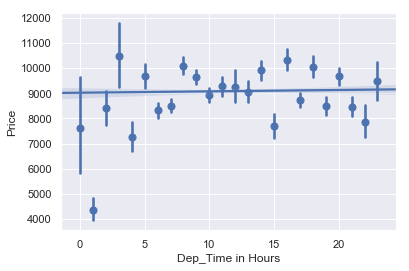

In [295]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.regplot(x="Dep_Time in Hours", y="Price", data=TrainDsModified,x_estimator=np.mean)

In [296]:
TrainDsModified.head()

,Airline,Source,Destination,Additional_Info,Price,Dep_Time in Hours,Arrival_Time in Hours,Arrival_Time in Minutes,Duration in hours,Duration in minutes,Total_StopsCount,Date_of_Journey_byDay,Date_of_Journey_byMonth
0,IndiGo,Banglore,New Delhi,No info,3897,22,1,10,2,50,0,24,3
1,Air India,Kolkata,Banglore,No info,7662,5,13,15,7,25,2,1,5
2,Jet Airways,Delhi,Cochin,No info,13882,9,4,25,19,0,2,9,6
3,IndiGo,Kolkata,Banglore,No info,6218,18,23,30,5,25,1,12,5
4,IndiGo,Banglore,New Delhi,No info,13302,16,21,35,4,45,1,1,3


C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


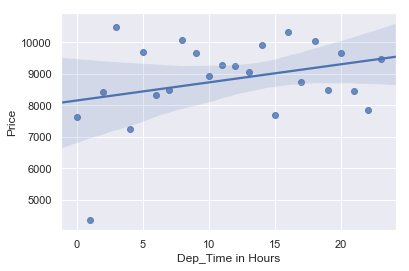

In [297]:
TrainDsModifiedPlot=pd.DataFrame(TrainDsModified.sort_values(by=['Dep_Time in Hours']).groupby(['Dep_Time in Hours'])['Price'].mean()).reset_index()
sns.regplot(x="Dep_Time in Hours", y="Price", data=TrainDsModifiedPlot);
### Flight towards night is costly .. Flight prices are constnt form 11 to 16 hours and increase early morning and late afternoon to  evening 

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


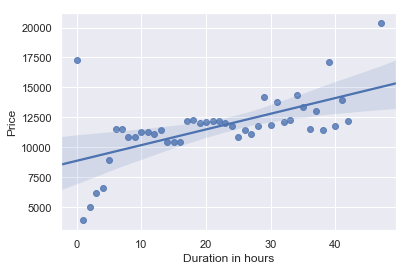

In [298]:
TrainDsModifiedPlot=pd.DataFrame(TrainDsModified.sort_values(by=['Duration in hours']).groupby(['Duration in hours'])['Price'].mean()).reset_index()
sns.regplot(x="Duration in hours", y="Price", data=TrainDsModifiedPlot);
### flights for high travel time are costly. aclear linear relation ship is prree=sent

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


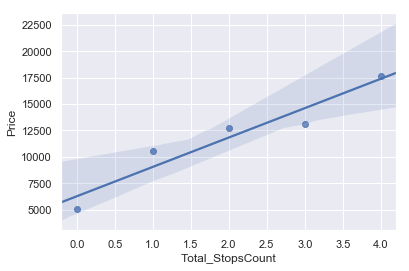

In [299]:
# Total_StopsCount           
TrainDsModifiedPlot=pd.DataFrame(TrainDsModified.sort_values(by=['Total_StopsCount']).groupby(['Total_StopsCount'])['Price'].mean()).reset_index()
sns.regplot(x="Total_StopsCount", y="Price", data=TrainDsModifiedPlot);
### flights with higher no of stops will be costly and again a linear trend is visisble

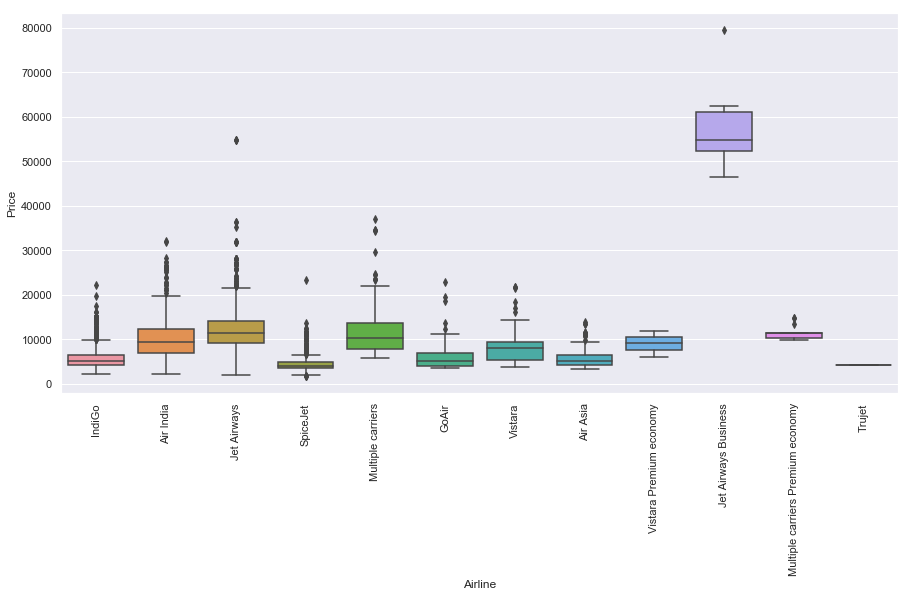

In [300]:
fig, ax = plt.subplots(figsize=(15,7))
plt.ax=ax
plt.xticks(rotation=90)
ax=sns.boxplot(x="Airline",y="Price",data=TrainDsModified,ax=ax) 
### Many outliers / extreme price rises present for many flights like Indigo, AirIndia, Jetairways, Multiple carrier, spicejets..
# Mean price is quiet high for Jet buisness Airways as compared to other airways and mostly flights are 

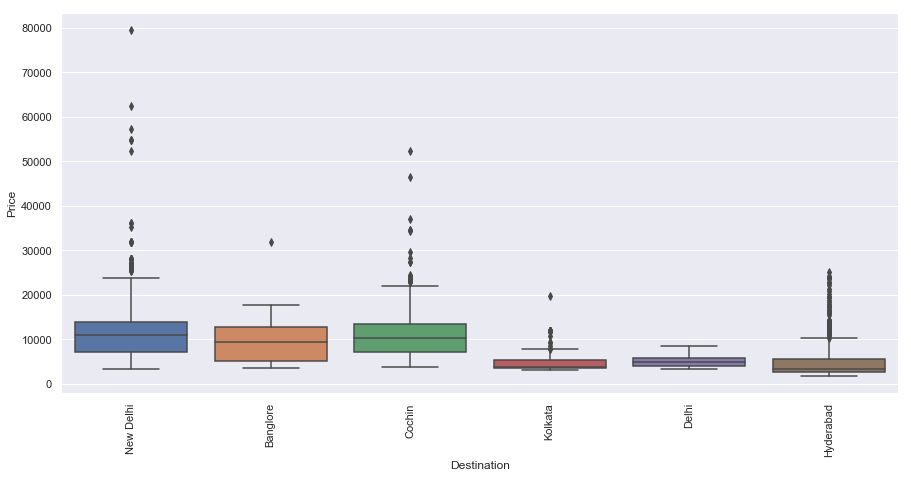

In [301]:
fig, ax = plt.subplots(figsize=(15,7))
plt.ax=ax
plt.xticks(rotation=90)
ax=sns.boxplot(x="Destination",y="Price",data=TrainDsModified,ax=ax) 
## Delhi have higher flight prices though Bangalore an dother cities though a lot of price surges are there for bangaore.

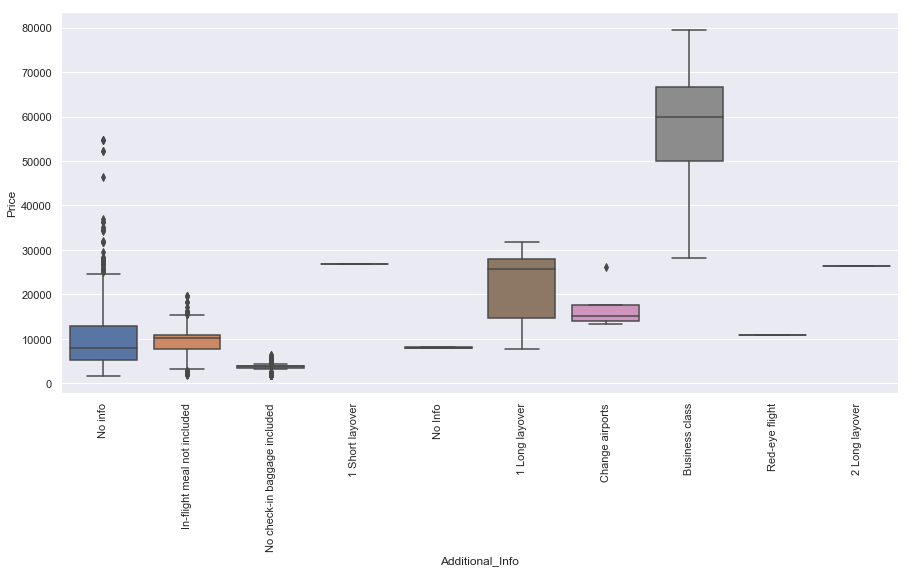

In [302]:
# Additional_Info
fig, ax = plt.subplots(figsize=(15,7))
plt.ax=ax
plt.xticks(rotation=90)
ax=sns.boxplot(x="Additional_Info",y="Price",data=TrainDsModified,ax=ax) 
## Delhi have higher flight prices though Bangalore an dother cities though a lot of price surges are there for bangaore.

In [303]:
CL_CATEGORICAL_COLUMNS=TrainDsModified.select_dtypes(exclude=['int', 'float','int64']).columns
categoricalDS=TrainDsModified[CL_CATEGORICAL_COLUMNS]

In [304]:
CL_CATEGORICAL_COLUMNS1=TestDsModified.select_dtypes(exclude=['int', 'float','int64']).columns
categoricalDStest=TestDsModified[CL_CATEGORICAL_COLUMNS1]

In [305]:
### Lets try to reduce the no of categories for categorical variables...
# TrainDsModified
for i in range(len(categoricalDS.columns)):
     print("Unique Values of ",categoricalDS.columns[i],len(pd.value_counts(categoricalDS[categoricalDS.columns[i]])))

Unique Values of  Airline 12
Unique Values of  Source 5
Unique Values of  Destination 6
Unique Values of  Additional_Info 10


In [306]:
### Lets try to reduce the no of categories for categorical variables...
# TrainDsModified
for i in range(len(categoricalDStest.columns)):
     print("Unique Values of ",categoricalDStest.columns[i],len(pd.value_counts(categoricalDStest[categoricalDStest.columns[i]])))

Unique Values of  Airline 11
Unique Values of  Source 5
Unique Values of  Destination 6
Unique Values of  Additional_Info 6


In [307]:
### Lets chekc value counts seperately
categoricalDS['Airline'].value_counts()   ### remove last four and replace them by most frequent ones...
# categoricalDStest
#categoricalDStest['Airline'].value_counts()  

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [308]:
categoricalDStest['Airline'].value_counts() 

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [314]:
import random
topvalue=list(filter(None,categoricalDS['Airline'].value_counts()[0:7].index))
for x in categoricalDS.index.values:
    categoricalDS.set_value(x,'Airline',random.choice(topvalue))

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [315]:
import random
topvalue1=list(filter(None,categoricalDStest['Airline'].value_counts()[0:7].index))
for x in categoricalDStest.index.values:
    categoricalDStest.set_value(x,'Airline',random.choice(topvalue1))

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [316]:
categoricalDS['Additional_Info'].value_counts()[0:4]

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Name: Additional_Info, dtype: int64

In [317]:
categoricalDStest['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [318]:
topvalue=list(filter(None,categoricalDS['Additional_Info'].value_counts()[0:3].index))
#topvalue=list(filter(None,categoricalDS['Additional_Info'].value_counts().index))
for x in categoricalDS.index.values:
    categoricalDS.set_value(x,'Additional_Info',random.choice(topvalue))

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [319]:
topvalue1=list(filter(None,categoricalDStest['Additional_Info'].value_counts()[0:3].index))
#topvalue1=list(filter(None,categoricalDStest['Additional_Info'].value_counts().index))
for x in categoricalDStest.index.values:
    categoricalDStest.set_value(x,'Additional_Info',random.choice(topvalue1))

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [320]:
topvalue

['No info',
 'In-flight meal not included',
 'No check-in baggage included',
 '1 Long layover',
 'Change airports',
 'Business class',
 'No Info',
 '2 Long layover',
 'Red-eye flight',
 '1 Short layover']

In [321]:
topvalue1

['No info',
 'In-flight meal not included',
 'No check-in baggage included',
 'Change airports',
 'Business class',
 '1 Long layover']

In [322]:
## Lets replace original main dataset column with these clumns
TrainDsModified['Additional_Info']=categoricalDS['Additional_Info']
TrainDsModified['Airline']=categoricalDS['Airline']
TestDsModified['Additional_Info']=categoricalDStest['Additional_Info']
TestDsModified['Airline']=categoricalDStest['Airline']

In [323]:
TrainDsModified.info()
#TrainDsModified.to_csv("TrainDsModifiedFinal.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
Airline                    10682 non-null object
Source                     10682 non-null object
Destination                10682 non-null object
Additional_Info            10682 non-null object
Price                      10682 non-null int64
Dep_Time in Hours          10682 non-null int64
Arrival_Time in Hours      10682 non-null int64
Arrival_Time in Minutes    10682 non-null int64
Duration in hours          10682 non-null int32
Duration in minutes        10682 non-null int32
Total_StopsCount           10682 non-null int32
Date_of_Journey_byDay      10682 non-null int64
Date_of_Journey_byMonth    10682 non-null int64
dtypes: int32(3), int64(6), object(4)
memory usage: 1.3+ MB


In [324]:
TestDsModified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 12 columns):
Airline                    2671 non-null object
Source                     2671 non-null object
Destination                2671 non-null object
Additional_Info            2671 non-null object
Dep_Time in Hours          2671 non-null int64
Arrival_Time in Hours      2671 non-null int64
Arrival_Time in Minutes    2671 non-null int64
Duration in hours          2671 non-null int32
Duration in minutes        2671 non-null int32
Total_StopsCount           2671 non-null int32
Date_of_Journey_byDay      2671 non-null int64
Date_of_Journey_byMonth    2671 non-null int64
dtypes: int32(3), int64(5), object(4)
memory usage: 219.2+ KB


In [325]:
### Lets check for misisng and blank value
TrainDsModified.apply(lambda x: x.isnull().sum())
# QualificationDs.apply(lambda x: x.isnull().sum(), axis='columns')

Airline                    0
Source                     0
Destination                0
Additional_Info            0
Price                      0
Dep_Time in Hours          0
Arrival_Time in Hours      0
Arrival_Time in Minutes    0
Duration in hours          0
Duration in minutes        0
Total_StopsCount           0
Date_of_Journey_byDay      0
Date_of_Journey_byMonth    0
dtype: int64

In [326]:
TrainDsModified.to_csv("TrainDsModifiedFinal.csv")

In [327]:
TrainDsModified.head()

,Airline,Source,Destination,Additional_Info,Price,Dep_Time in Hours,Arrival_Time in Hours,Arrival_Time in Minutes,Duration in hours,Duration in minutes,Total_StopsCount,Date_of_Journey_byDay,Date_of_Journey_byMonth
0,Air Asia,Banglore,New Delhi,2 Long layover,3897,22,1,10,2,50,0,24,3
1,Air Asia,Kolkata,Banglore,No info,7662,5,13,15,7,25,2,1,5
2,Jet Airways,Delhi,Cochin,Red-eye flight,13882,9,4,25,19,0,2,9,6
3,Vistara,Kolkata,Banglore,1 Short layover,6218,18,23,30,5,25,1,12,5
4,SpiceJet,Banglore,New Delhi,Red-eye flight,13302,16,21,35,4,45,1,1,3


In [328]:
##3 find corelation b/w columns for dropping ...
CL_CONTINUOS_COLUMNS=TrainDsModified._get_numeric_data().columns
TrainDsModified[CL_CONTINUOS_COLUMNS].corr()

,Price,Dep_Time in Hours,Arrival_Time in Hours,Arrival_Time in Minutes,Duration in hours,Duration in minutes,Total_StopsCount,Date_of_Journey_byDay,Date_of_Journey_byMonth
Price,1.000000,0.006799,0.024244,-0.086155,0.508778,-0.124855,0.603897,-0.153774,-0.103643
Dep_Time in Hours,0.006799,1.000000,0.005180,0.067911,0.002869,-0.023707,-0.061476,0.002170,0.039127
Arrival_Time in Hours,0.024244,0.005180,1.000000,-0.154363,0.055276,-0.118309,0.038140,-0.003245,-0.003927
Arrival_Time in Minutes,-0.086155,0.067911,-0.154363,1.000000,-0.074450,0.151628,-0.106940,-0.017510,-0.100626
Duration in hours,0.508778,0.002869,0.055276,-0.074450,1.000000,-0.126468,0.739916,-0.022059,0.016141
Duration in minutes,-0.124855,-0.023707,-0.118309,0.151628,-0.126468,1.000000,-0.136706,-0.008940,-0.040897
Total_StopsCount,0.603897,-0.061476,0.038140,-0.106940,0.739916,-0.136706,1.000000,-0.009451,0.054383
Date_of_Journey_byDay,-0.153774,0.002170,-0.003245,-0.017510,-0.022059,-0.008940,-0.009451,1.000000,-0.038359
Date_of_Journey_byMonth,-0.103643,0.039127,-0.003927,-0.100626,0.016141,-0.040897,0.054383,-0.038359,1.000000


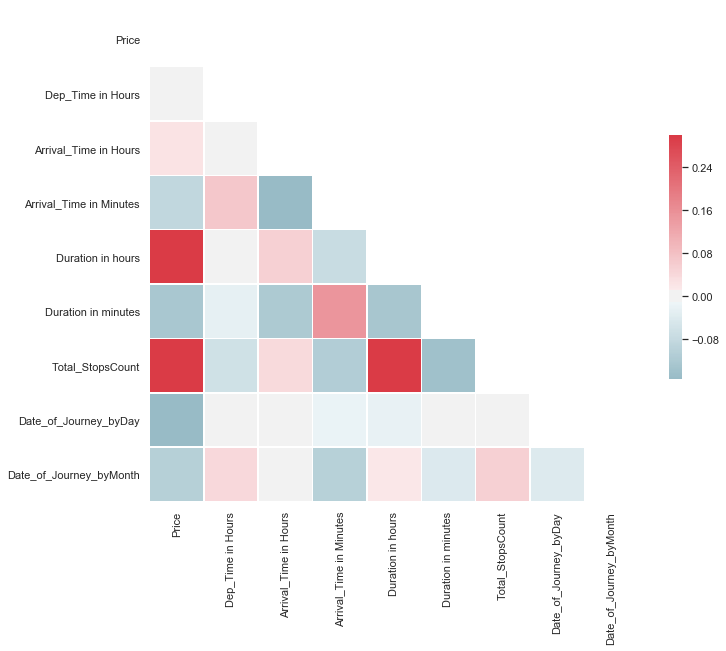

In [329]:
## plotting corelation b/w continous variables
sns.set(style="white")

# Compute the correlation matrix
corr = TrainDsModified[CL_CONTINUOS_COLUMNS].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [330]:
TrainDsModified.head()
## dropping columns # Arrival_Time in Hours ,Arrival_Time in Minutes Duration in minutes

,Airline,Source,Destination,Additional_Info,Price,Dep_Time in Hours,Arrival_Time in Hours,Arrival_Time in Minutes,Duration in hours,Duration in minutes,Total_StopsCount,Date_of_Journey_byDay,Date_of_Journey_byMonth
0,Air Asia,Banglore,New Delhi,2 Long layover,3897,22,1,10,2,50,0,24,3
1,Air Asia,Kolkata,Banglore,No info,7662,5,13,15,7,25,2,1,5
2,Jet Airways,Delhi,Cochin,Red-eye flight,13882,9,4,25,19,0,2,9,6
3,Vistara,Kolkata,Banglore,1 Short layover,6218,18,23,30,5,25,1,12,5
4,SpiceJet,Banglore,New Delhi,Red-eye flight,13302,16,21,35,4,45,1,1,3


In [331]:
#TrainDsModified=TrainDsModified.drop(['Arrival_Time in Hours','Arrival_Time in Minutes','Duration in minutes','Destination','Date_of_Journey_byDay','Date_of_Journey_byDay'],axis=1)
TestDsModified=TestDsModified.drop(['Source','Destination','Date_of_Journey_byDay','Arrival_Time in Minutes','Duration in minutes'],axis=1)
TrainDsModified=TrainDsModified.drop(['Source','Destination','Date_of_Journey_byDay','Arrival_Time in Minutes','Duration in minutes'],axis=1)

In [332]:
TrainDsModified.head()

,Airline,Additional_Info,Price,Dep_Time in Hours,Arrival_Time in Hours,Duration in hours,Total_StopsCount,Date_of_Journey_byMonth
0,Air Asia,2 Long layover,3897,22,1,2,0,3
1,Air Asia,No info,7662,5,13,7,2,5
2,Jet Airways,Red-eye flight,13882,9,4,19,2,6
3,Vistara,1 Short layover,6218,18,23,5,1,5
4,SpiceJet,Red-eye flight,13302,16,21,4,1,3


## get test and train data...
# Dependent Variable
Y_train = TrainDsModified['Price']  # 6 is the index of "Price" in the Training Set 

# Independent Variables
X_train = TrainDsModified.iloc[:,TrainDsModified.columns != 'Price'].values # selects all columns except "Price"

# Independent Variables for Test Set
X_test = TestDsModified

In [333]:
## Convert into dummies.
# from sklearn.preprocessing import LabelEncoder

In [334]:
TrainDsModified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 8 columns):
Airline                    10682 non-null object
Additional_Info            10682 non-null object
Price                      10682 non-null int64
Dep_Time in Hours          10682 non-null int64
Arrival_Time in Hours      10682 non-null int64
Duration in hours          10682 non-null int32
Total_StopsCount           10682 non-null int32
Date_of_Journey_byMonth    10682 non-null int64
dtypes: int32(2), int64(4), object(2)
memory usage: 987.6+ KB


In [335]:
TestDsModified.head()
TestDsModified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 7 columns):
Airline                    2671 non-null object
Additional_Info            2671 non-null object
Dep_Time in Hours          2671 non-null int64
Arrival_Time in Hours      2671 non-null int64
Duration in hours          2671 non-null int32
Total_StopsCount           2671 non-null int32
Date_of_Journey_byMonth    2671 non-null int64
dtypes: int32(2), int64(3), object(2)
memory usage: 125.3+ KB


TrainDsModifiedFinal=pd.get_dummies(TrainDsModified,drop_first=True)
TestDsModifiedFinal=pd.get_dummies(TestDsModified,drop_first=True)

# Dependent Variable
Y_train = TrainDsModified.iloc[:,3].values  # 6 is the index of "Price" in the Training Set 

# Independent Variables
X_train = TrainDsModified.iloc[:,TrainDsModified.columns != 'Price'].values # selects all columns except "Price"

# Independent Variables for Test Set
X_test = TestDsModified.iloc[:,:].values

# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

# Training Set    

X_train[:,0] = le1.fit_transform(X_train[:,0])

X_train[:,1] = le1.fit_transform(X_train[:,1])
# Test Set


X_test[:,0] = le2.fit_transform(X_test[:,0])

X_test[:,1] = le2.fit_transform(X_test[:,1])


In [336]:
X_train=TrainDsModified.drop('Price',axis=1)
X_train=pd.get_dummies(X_train)
# pd.get_dummies(s)

In [337]:
Y_train=TrainDsModified['Price']

In [338]:
X_test=TestDsModified
X_test=pd.get_dummies(X_test)

In [339]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

In [340]:
from xgboost import XGBRegressor
regressor  = XGBRegressor()

In [341]:
regressor.fit(X_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [342]:
y_predTrain = regressor.predict(X_train1)

In [343]:
# X_test
y_predTest = regressor.predict(X_test1)

In [344]:
def rmsle(y_pred,y_test) :
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    Acc = 1 - error
    return Acc

print("Accuracy attained on Training Set = ",rmsle(y_predTrain, y_train1))
print("Accuracy attained on Test Set = ",rmsle(y_predTest, y_test1))

Accuracy attained on Training Set =  0.8750475642920397
Accuracy attained on Test Set =  0.8691732219273725


In [248]:
y_predTest

array([10184.643 ,  8485.2705,  5356.5195, ..., 12558.34  , 11014.988 ,
        5418.991 ], dtype=float32)

In [249]:
y_predFinal = regressor.predict(X_test)

In [250]:
y_predFinal

array([ 9903.336 ,  5249.8286, 10994.496 , ..., 14362.551 , 14293.521 ,
       10256.151 ], dtype=float32)

In [252]:
pd.DataFrame(y_predFinal, columns = ['Price']).to_excel("D:\DataScience\Hackathon\FlightPriceHackathon\Flight_Ticket_Participant_Datasets\Submit18.xlsx", index = False)